In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
## training image

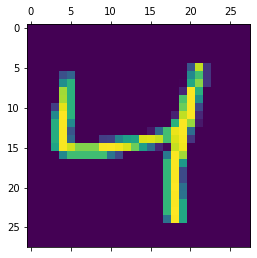

In [7]:
plt.matshow(X_train[2])

In [8]:
##orignal numbers

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
X_train=X_train/255
X_test=X_test/255

In [25]:
### converting 2-D array to 1-D array

In [26]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
X_test_flat=X_test.reshape(len(X_test),28*28)
X_test_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X_test_flat.shape

(10000, 784)

In [29]:
#creating model layer by layer

In [30]:
model=keras.Sequential([
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [31]:
##
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
##epoches are no of iterations for which your neural network is going for training
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4665 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3030 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9259


In [33]:
# evaluate() is for evaluating the already trained model using the validation (or test) data and the corresponding labels. 
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.9251


[0.2673855721950531, 0.9251000285148621]

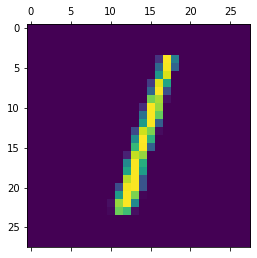

In [40]:
plt.matshow(X_test[2])

In [37]:
#the model returns the probability for each outcome class as a value between 0 and 1
y_pred=model.predict(X_test_flat)

In [38]:
y_pred[1]

array([5.3640330e-01, 7.4260533e-03, 9.9939024e-01, 4.3706381e-01,
       6.0499472e-10, 8.2850063e-01, 8.9412653e-01, 8.9576664e-13,
       1.7118111e-01, 2.0017932e-09], dtype=float32)

In [41]:
## final prediction
np.argmax(y_pred[2])

1

In [44]:
y_pred=[np.argmax(i) for i in y_pred]

In [48]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

In [46]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [47]:
y_pred[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [49]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,   11,  912,   19,    7,    4,   13,    9,   47,    3],
       [   2,    0,   16,  933,    0,   17,    2,   11,   23,    6],
       [   1,    1,    2,    1,  912,    0,   15,    5,   10,   35],
       [   9,    3,    1,   46,    8,  760,   18,    7,   34,    6],
       [   8,    3,    5,    1,    6,   10,  921,    2,    2,    0],
       [   1,    6,   21,    8,    7,    0,    0,  950,    4,   31],
       [   8,   10,    5,   21,    8,   23,   11,   13,  870,    5],
       [  10,    7,    1,   12,   24,    6,    0,   24,   10,  915]],
      dtype=int32)>

Text(114.0, 0.5, 'Truth')

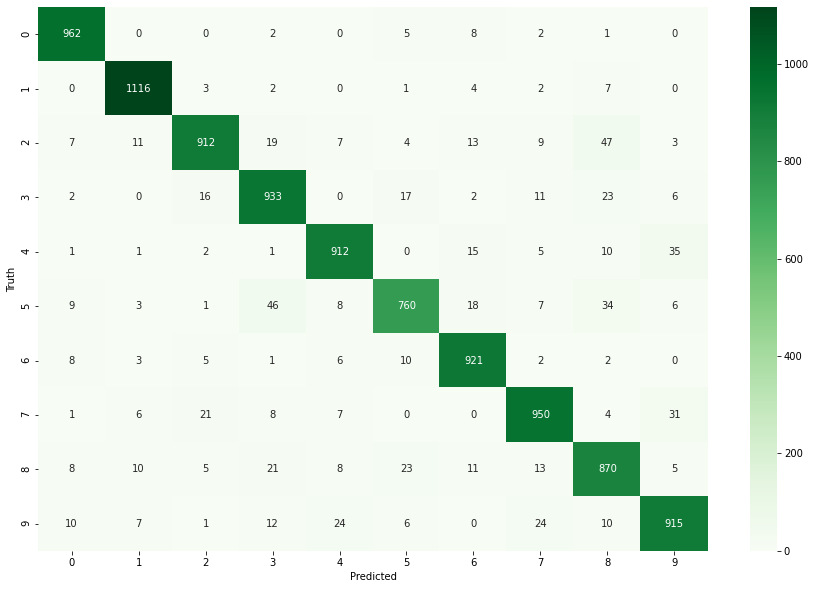

In [54]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d',cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
##applying hidden layer

model=keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1217 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - accuracy: 0.9835


In [57]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0734 - accuracy: 0.9759


[0.0733676552772522, 0.9758999943733215]

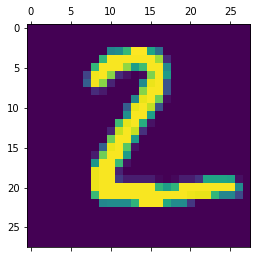

In [60]:
plt.matshow(X_test[1])

In [61]:
y_pred=model.predict(X_test_flat)

In [62]:
y_pred

array([[3.4974068e-02, 9.0393136e-05, 7.8890032e-01, ..., 9.9994975e-01,
        2.9471731e-01, 1.3484415e-01],
       [6.9916427e-02, 3.6867431e-01, 9.9998796e-01, ..., 1.0740825e-05,
        3.8821748e-01, 1.5373816e-07],
       [1.6787648e-04, 9.9595129e-01, 1.0089064e-01, ..., 3.1810373e-01,
        4.1724750e-01, 9.6592307e-04],
       ...,
       [3.0422716e-05, 5.1894784e-04, 1.0398164e-06, ..., 5.6435108e-01,
        6.0792309e-01, 9.8621577e-01],
       [4.1564405e-03, 3.1247735e-04, 1.1546572e-04, ..., 3.0061603e-04,
        9.9544346e-01, 8.8202953e-04],
       [4.1727343e-01, 5.9093869e-05, 3.5670030e-01, ..., 4.8821559e-05,
        6.7701936e-04, 3.1653047e-04]], dtype=float32)

In [63]:
y_pred=[np.argmax(i) for i in y_pred]

In [64]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [65]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(114.0, 0.5, 'Truth')

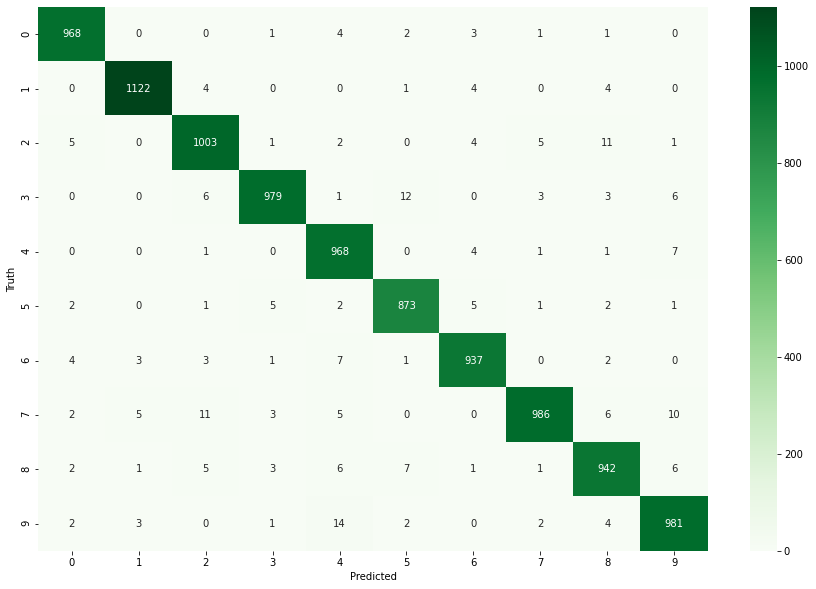

In [66]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d',cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:

model=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2746 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1206 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9843
